In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from string import punctuation


import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
URL1 = "https://myimmortalrehost.webs.com/chapters122.htm"
URL2 = "https://myimmortalrehost.webs.com/chapters2344.htm"

In [3]:
page1 = requests.get(URL1)
page2 = requests.get(URL2)
print(page1.status_code)
print(page2.status_code)

200
200


In [4]:
HTMLstr1 = page1.text
HTMLstr2 = page2.text
soup1 = BeautifulSoup(HTMLstr1, "lxml")
soup2 = BeautifulSoup(HTMLstr2, "lxml")

In [5]:
print(soup1.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html>
 <head>
  <title>
   Chapters 1 - 22 - my immortal
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="My immortal, Tara Gilesbie, Harry Potter, Worst, fanfiction, Worst fanfiction ever, goth, vampire, hilarious, awful, goffic, goffik" name="keywords"/>
  <meta content="The infamous harry potter fanfiction  My immortal  dubbed worst fan fiction ever. Hilariously bad with worst abuse to english ever." name="description"/>
  <!-- master default -->
  <link href="https://myimmortalrehost.webs.com/chapters122.htm" rel="canonical"/>
  <meta content="my immortal" property="og:site_name"/>
  <meta content="Chapters 1 - 22" property="og:title"/>
  <link href="https://static.websimages.com/static/global/theme/css/pluggables.css" rel="stylesheet" type="text/css"/>
  <script src="https://static.websimages.com/static/global/js/webs/usersites/webs_common.j

In [6]:
soup1.find_all("p")

[<p>Chapter 1.<br/><br/>AN: Special fangz (get it, coz Im goffik) 2 my gf (ew not in that way) raven, bloodytearz666 4 helpin me wif da story and spelling. U rok! Justin ur da luv of my deprzzing life u rok 2! MCR ROX!<br/><br/>XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX<br/><br/>Hi my name is Ebony Dark’ness Dementia Raven Way and I have long ebony black hair (that’s how I got my name) with purple streaks and red tips that reaches my mid-back and icy blue eyes like limpid tears and a lot of people tell me I look like Amy Lee (AN: if u don’t know who she is get da hell out of here!). I’m not related to Gerard Way but I wish I was because he’s a major fucking hottie. I’m a vampire but my teeth are straight and white. I have pale white skin. I’m also a witch, and I go to a magic school called Hogwarts in England where I’m in the seventh year (I’m seventeen). I’m a goth (in case you couldn’t tell) and I wear mostly black. I love Hot Topic and I buy all my clothes from there. For example toda

In [7]:
wctext1=soup1.find('p')
wctext2=soup2.find('p')
wctext1

<p>Chapter 1.<br/><br/>AN: Special fangz (get it, coz Im goffik) 2 my gf (ew not in that way) raven, bloodytearz666 4 helpin me wif da story and spelling. U rok! Justin ur da luv of my deprzzing life u rok 2! MCR ROX!<br/><br/>XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX<br/><br/>Hi my name is Ebony Dark’ness Dementia Raven Way and I have long ebony black hair (that’s how I got my name) with purple streaks and red tips that reaches my mid-back and icy blue eyes like limpid tears and a lot of people tell me I look like Amy Lee (AN: if u don’t know who she is get da hell out of here!). I’m not related to Gerard Way but I wish I was because he’s a major fucking hottie. I’m a vampire but my teeth are straight and white. I have pale white skin. I’m also a witch, and I go to a magic school called Hogwarts in England where I’m in the seventh year (I’m seventeen). I’m a goth (in case you couldn’t tell) and I wear mostly black. I love Hot Topic and I buy all my clothes from there. For example today

In [8]:
for a in wctext1.findAll('br'):
    nah=" "
    a.replaceWith(" %s " % nah)

In [9]:
for a in wctext2.findAll('br'):
    nah=" "
    a.replaceWith(" %s " % nah)

In [10]:
wctext2

<p>   Chapter 23.      AN: dhut da fok up biches!1 ur jus jelos koz I gut 10000 reviowz!1 fangz 2 raven 4 da help n telin me bout da boox gurlu rok letz go shopin 2getha!      XXXXXXXXXXXXXXXXX666XXXXXXXXXXXXXXXXXXXXXXXXX      The door opened and Proffesor Rumbridge and Cornelia Fudge stomped out angrily. Then Dumbledum and Rumbridge sawed us.      “MR. WAY WHAT THE BEEP ARE YOU DOING!” Rumbridge shouted angrily. Dumbledore blared at her.      “Oops she made a mistake!” he corrupted her. “She means hi everybody cum in!”      Well we all came in angrily. So did all the other students. I sat between Darkness and Draco and opposite B’loody Mary. Crab and Goyle started 2 make some morbid jokes. They both looked exactly like Ville Vollo. I eight some Count Chocula and drank som blood from a cup. Then I herd someone shooting angrily. I looked behind me it was………Vampire! He and Draco were shooting at eachother.      “Vampire, Draco WTF?” I asked.      “You fucking bustard!” yelled Draco at Va

In [11]:
wctext1=str(wctext1)
wctext2=str(wctext2)

wctext=wctext1+" "+wctext2

wctext = wctext.lower()

tknz_wct = word_tokenize(wctext)

In [12]:
tknz_wct[:5]

['<', 'p', '>', 'chapter', '1.']

In [13]:
tknz_wct[-5:]

['i', 'shooted.', '<', '/p', '>']

In [14]:
len(tknz_wct)

28854

In [15]:
for token in tknz_wct:
    if token in punctuation:
        tknz_wct.remove(token)

In [16]:
len(tknz_wct)

25542

In [17]:
tknz_wct[:5]

['p', 'chapter', '1.', 'an', 'special']

In [18]:
tknz_wct[-5:]

['”', 'i', 'shooted.', '<', '/p']

In [19]:
eng_stopwords = stopwords.words('english')

In [20]:
newtext = []

for token in tknz_wct:
    if token not in eng_stopwords:
        newtext.append(token)

In [21]:
len(newtext)

16105

In [22]:
textcl=""
for text in newtext:
    textcl=textcl+" "+text

In [23]:
textcl

" p chapter 1. special fangz get coz im goffik 2 gf ew way raven bloodytearz666 4 helpin wif da story spelling u rok justin ur da luv deprzzing life u rok 2 mcr rox xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx hi name ebony dark ’ ness dementia raven way long ebony black hair ’ got name purple streaks red tips reaches mid-back icy blue eyes like limpid tears lot people tell look like amy lee u ’ know get da hell ’ related gerard way wish ’ major fucking hottie ’ vampire teeth straight white pale white skin ’ also witch go magic school called hogwarts england ’ seventh year ’ seventeen ’ goth case ’ tell wear mostly black love hot topic buy clothes example today wearing black corset matching lace around black leather miniskirt pink fishnets black combat boots wearing black lipstick white foundation black eyeliner red eye shadow walking outside hogwarts snowing raining sun happy lot preps stared put middle finger “ hey ebony ” shouted voice looked was… draco malfoy “ ’ draco ” asked “ nothin

## Entire Text:

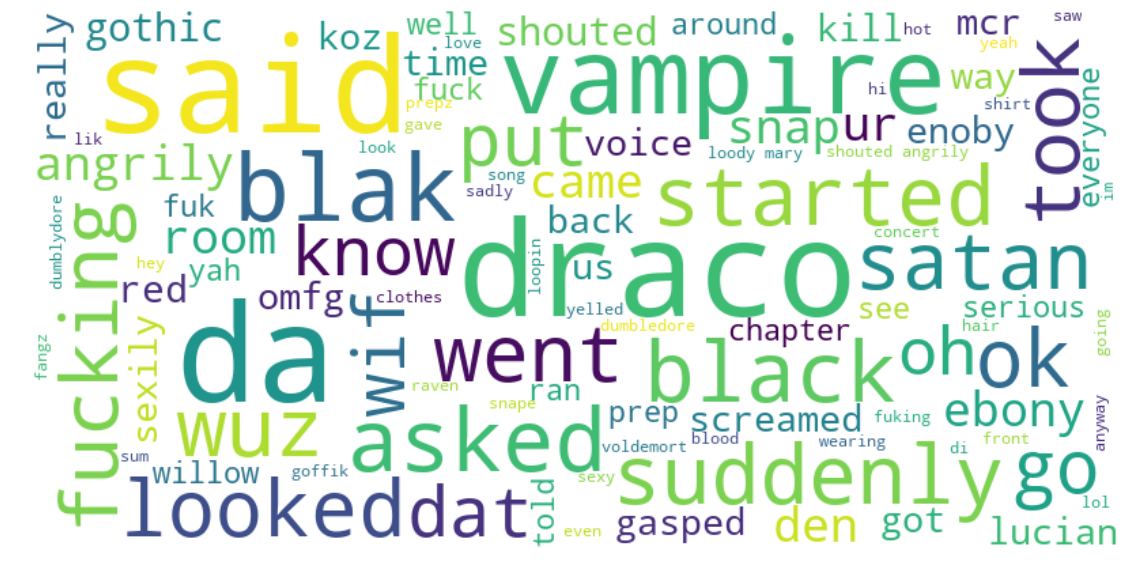

In [24]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",width=800, height=400).generate(textcl)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
sid = SentimentIntensityAnalyzer()

In [26]:
pos=""
neg=""
neu=""
for text in newtext:
    if (sid.polarity_scores(text)['compound'])>0.2:
        pos=pos+" "+text
    elif (sid.polarity_scores(text)['compound'])<-0.2:
        neg=neg+" "+text
    else:
        neu=neu+" "+text

## Negative Words:

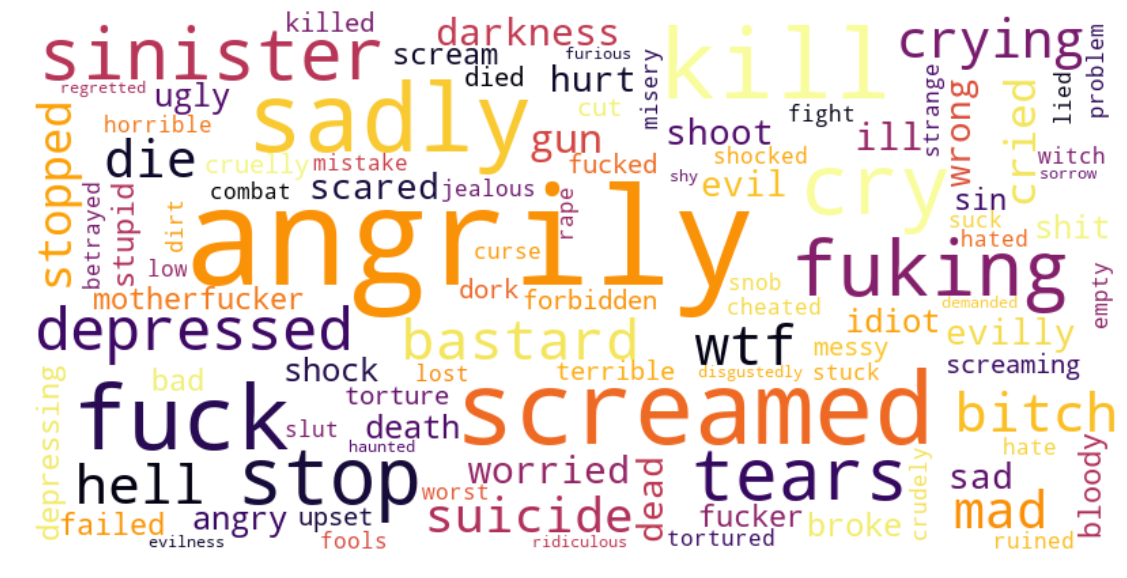

In [28]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",width=800, height=400,colormap='inferno').generate(neg)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Neutral Words:

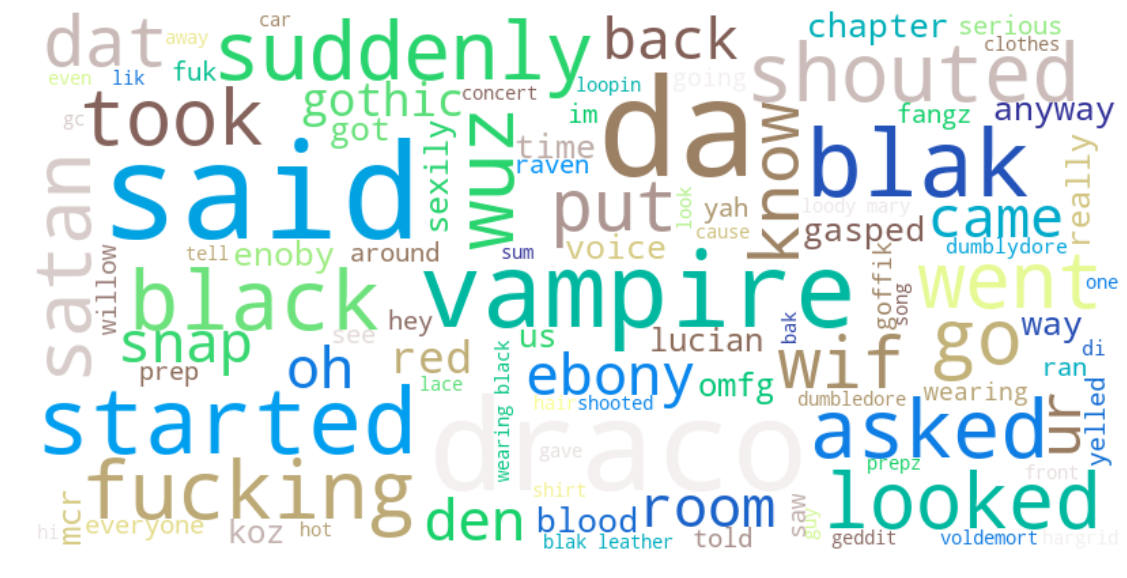

In [29]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",width=800, height=400,colormap='terrain').generate(neu)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Positive Words:

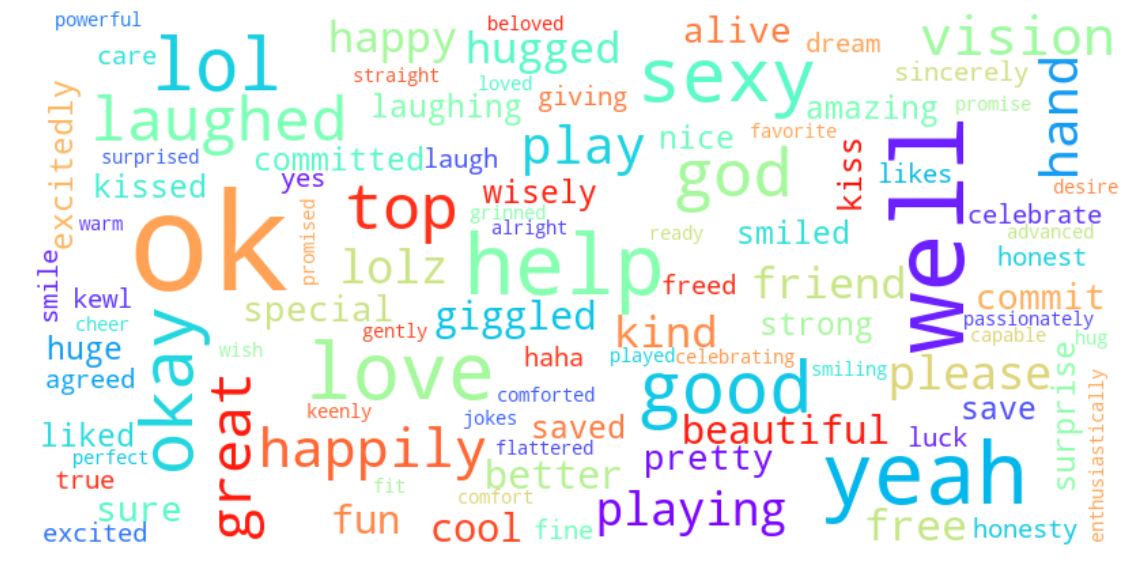

In [30]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",width=800, height=400,colormap='rainbow').generate(pos)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()